# Part IV: Supplementing with the Unsupervised:
## Deep Belief Networks

In [6]:
from IPython.display import Image
Image(filename = "rbm2.png", width=450)

##  Deleting the Real S&P Price Data and Forecasting from Scratch
### The stocks left over do not have prices; they only have Technical Indicators.

In [0]:
DATA_training=np.load(path+'DATA_training.npy')
DATA_test=np.load(path+'DATA_test.npy')

In [0]:
data_training = np.delete(DATA_training,range(0,5),axis=1)

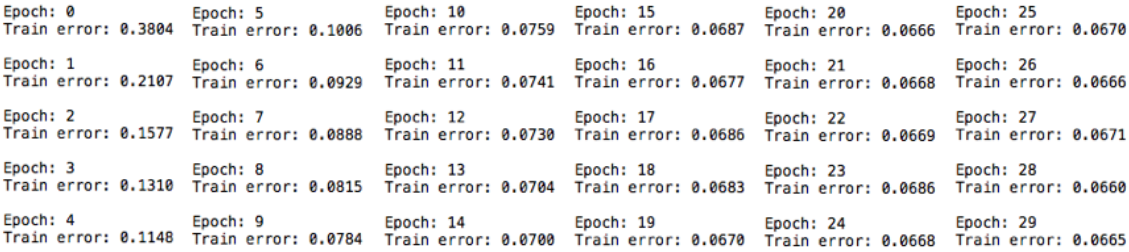

In [9]:
Image(filename = "8000score.png", width=900)

In [11]:
Image(filename = "8000graph.png", width=450)

## Does the number of Hidden Nodes matter?

In [0]:
#@title
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
errors = []

for i in range(1,1001,1):
    print('Training Deep Belief Network with '+str(i)+' Hidden Nodes.')
    gbrbm_2000 = GBRBM(n_visible=data_training.shape[1], n_hidden=i, learning_rate=0.01, momentum=0.95)
    errs = gbrbm_2000.fit(data_training, n_epoches=30, batch_size=90)

    data_training_new = gbrbm_2000.reconstruct(data_training)
    data_training_dbn = np.column_stack((DATA_training[:,range(0,5)],data_training_new))
    
    
    y = data_training_dbn[:,0]
    x = np.delete(data_training_dbn,0,axis=1)
    clf_dbn = SVR(C=1.0, epsilon=0.2)
    clf_dbn.fit(x,y)

    data_test = np.delete(DATA_test,range(0,5),axis=1)
    data_test_new = gbrbm_2000.reconstruct(data_test)
    data_test_dbn = np.column_stack((DATA_test[:,range(0,5)],data_test_new))

    yt_dbn = data_test_dbn[:,0]
    xt_dbn = np.delete(data_test_dbn,0,axis=1)

    yp_dbn = clf_dbn.predict(xt_dbn)

    NMSE = sum((yt_dbn-yp_dbn)**2)/sum((yt_dbn-np.mean(yt_dbn))**2)

    Yt_DA = np.delete(yt_dbn,0) - np.delete(yt_dbn,-1)
    Yp_DA = np.delete(yp_dbn,0) - np.delete(yt_dbn,-1)
    Y_DA = Yt_DA * Yp_DA
    DA = sum(Y_DA>0)/len(Y_DA)
    errors.append([i,NMSE,DA])

    print('SVM+DBN('+str(i)+'): NMSE: '+str(NMSE)+' DA: '+str(DA*100)+'%'+'\n')

In [0]:
import pandas as pd
errorDf = pd.DataFrame(errors,columns=['Hidden Neurons','Normalized Mean Square Error','S&P500 Directional Accuracy'])
errorDf.to_csv(path+'errorsDiffNeurons.csv',index=False)

In [0]:
import pandas as pd 
errorDf = pd.read_csv(path+'../errorsDiffNeurons.csv')

<Figure size 576x396 with 0 Axes>

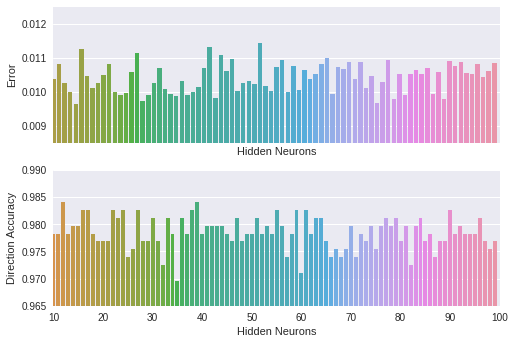

In [45]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt
plt.clf()
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True)
sns.set(style="darkgrid")
sns.barplot(x="Hidden Neurons", y="Normalized Mean Square Error",data=errorDf,ax=ax1)
ax1.set_ylim(.0085,.0125)
ax1.set_xlim(20,100)
ax1.set_xticks(range(30, 100,10),range(30, 100,10))
ax1.set_ylabel('Error')
sns.barplot(x="Hidden Neurons", y="S&P500 Directional Accuracy",data=errorDf,ax=ax2)
ax2.set_ylim(.965,.990)
ax2.set_xlim(20, 100)
ax2.set_xticks(range(30, 100, 10),range(30, 100,10))
ax2.set_ylabel('Direction Accuracy')
plt.xticks(range(10, 110, 10),range(10, 110,10))
plt.show()

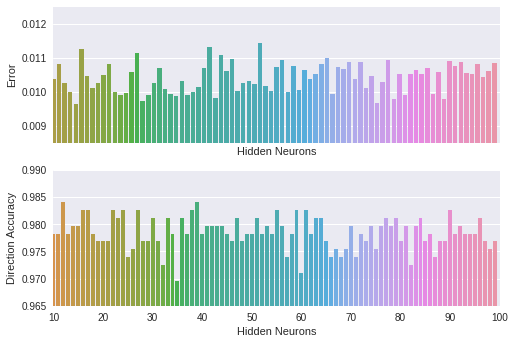

In [16]:
from IPython.display import Image
Image(filename = "neuron_graph.png", width=800)

In [17]:
Image(filename = "results.png", width=950)

#### The idea behind the model used in this presentation is obtained from the paper titled 
#### "Feature Extraction Using Restricted Boltzmann Machine for Stock Price Prediction"
#### written by Xianggao Cai, Su Hu, and Xiaola Lin from Sun Yat-sen University in Guangzhou, China.